<a href="https://colab.research.google.com/github/mustafaagent/YBI-Foundation/blob/main/Hand_Written_Digit_Prediction_Classification_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Written Digit Prediction - Classification
Objective : To Analysis the Hand Written Digit Prediction

Data Source : https://www.youtube.com/watch?v=UD6co1HVpO4&list=PLl3P-U08Zvwll_bzhyp-QPFO7CewOIGi2&index=6&t=18s



Import Library


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# Import Data

In [1]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

# Data Visualization

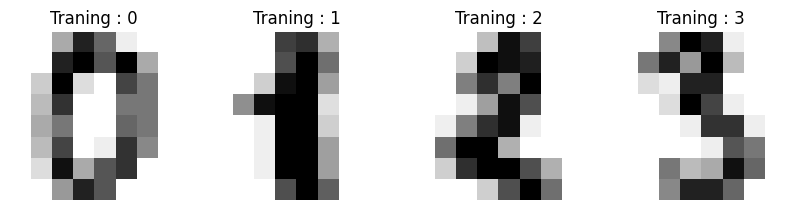

In [ ]:
_,axes = plt.subplots(nrows =1,ncols =4,figsize = (10,3))

for ax, image, label in zip (axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Traning : %i"%label)

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data = data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf =RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
y_pred

array([3, 0, 8, 6, 7, 8, 5, 0, 1, 2, 8, 3, 7, 5, 5, 1, 1, 9, 8, 3, 0, 2,
       6, 4, 9, 9, 9, 0, 5, 2, 9, 3, 1, 9, 5, 4, 4, 6, 5, 5, 1, 4, 0, 3,
       4, 6, 5, 4, 5, 8, 6, 5, 4, 8, 0, 8, 1, 2, 2, 2, 1, 9, 0, 5, 3, 4,
       0, 0, 5, 9, 6, 6, 3, 8, 5, 5, 7, 0, 9, 6, 0, 6, 9, 6, 3, 0, 8, 0,
       2, 5, 0, 1, 7, 4, 2, 9, 9, 1, 1, 7, 0, 0, 2, 4, 7, 2, 1, 8, 7, 0,
       1, 0, 5, 5, 2, 3, 8, 6, 4, 3, 8, 6, 5, 0, 7, 3, 3, 2, 0, 4, 4, 5,
       2, 9, 6, 6, 7, 0, 0, 0, 3, 0, 0, 8, 0, 4, 7, 8, 5, 3, 3, 4, 2, 6,
       0, 0, 8, 7, 0, 7, 7, 0, 8, 4, 7, 1, 3, 3, 2, 4, 9, 2, 3, 4, 9, 9,
       7, 8, 1, 2, 1, 5, 6, 5, 9, 2, 0, 2, 3, 3, 7, 6, 3, 5, 4, 7, 9, 4,
       2, 4, 3, 3, 7, 1, 1, 9, 5, 2, 4, 3, 3, 8, 1, 1, 1, 5, 9, 5, 2, 8,
       5, 8, 5, 4, 8, 7, 7, 9, 0, 0, 9, 8, 6, 9, 1, 9, 0, 4, 0, 2, 9, 4,
       6, 1, 6, 7, 3, 4, 4, 1, 8, 8, 8, 7, 1, 7, 8, 0, 9, 8, 1, 2, 6, 3,
       9, 6, 2, 1, 4, 3, 5, 0, 0, 8, 6, 5, 0, 8, 2, 2, 0, 5, 7, 7, 4, 9,
       5, 7, 1, 6, 4, 1, 2, 9, 6, 1, 3, 8, 2, 3, 4,

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[57,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 54,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 56,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 61]], dtype=int64)

# Prediction

In [ ]:
print(classification_report(y_test ,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.96      1.00      0.98        43
           2       1.00      0.96      0.98        56
           3       1.00      0.97      0.98        58
           4       0.98      0.98      0.98        58
           5       0.96      0.98      0.97        54
           6       1.00      1.00      1.00        45
           7       0.96      1.00      0.98        50
           8       0.93      0.95      0.94        55
           9       1.00      0.95      0.98        64

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Explaination :



Data Preparation: The code begins by loading the required libraries.

Then, it imports the MNIST dataset from sklearn.datasets. This dataset contains 70,000 handwritten digits (0 to 9) - both images and their labels.

After that, it splits the dataset into training and testing sets. This is a common practice in machine learning to evaluate the performance of the model.

Then, the code flattens the image data by reshaping it into 784 (28x28) features. This is because the data consists of 28x28 pixel images, and each pixel has an intensity value.

Then, it scales the features using the MinMaxScaler. This ensures that all features are on the same scale, helping the model to converge faster.

Now, it initializes the neural network model. This is done by using the Sequential model from keras. Sequential models in Keras are linear stacks of layers.

After initializing the model, the code adds a few layers to it. First, it adds a dense layer (also known as fully connected layer) with 128 neurons. This layer will learn the non-linear relationships in the data.

Then, it adds a dropout layer. This is a regularization technique that helps prevent overfitting. During training, this layer will randomly set a fraction of the neurons in the previous layer to 0.

Next, it adds another dense layer with 128 neurons. This layer will learn the higher-level features of the data.

After adding the dense layers, it adds a final dense layer with 10 neurons (one for each digit from 0 to 9). This layer will output the predicted digit.

The code then compiles the model by specifying the optimizer (Adam), loss function (Sparse Categorical Crossentropy), and metrics to evaluate the model's performance (accuracy).

After compiling the model, it fits the model to the training data. This involves training the model on the training data and adjusting the model's parameters accordingly.

Finally, the code evaluates the model's performance on the testing data. This involves passing the testing data through the model and comparing the predicted digit with the actual digit (ground truth).

The output will be the accuracy of the model on the testing data